In [ ]:
!pip install transformers==4.17

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.17.0 which is incompatible.


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [ ]:
import time
import numpy as np
import pandas as pd
import torch
from datasets import Dataset
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from torch.optim import AdamW  # Correct import here
from transformers import (
    AutoConfig,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
    EarlyStoppingCallback
)

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "barely-true",
    "1": "true"
  },
  "initializer_range": 0.02,
  "label2id": {
    "barely-true": 0,
    "false": 0,
    "half-true": 1,
    "mostly-true": 1,
    "pants-fire": 0,
    "true": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4

Map:   0%|          | 0/7557 [00:00<?, ? examples/s]

Map:   0%|          | 0/1264 [00:00<?, ? examples/s]

Using amp half precision backend
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:474: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: id, reason, __index_level_0__, input_text, evidence, statement. If id, reason, __index_level_0__, input_text, evidence, statement are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 7557
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 2365
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Auc Roc
1,0.573400,0.585683,0.690665,0.739738,0.652132,0.640294,0.792469
2,0.488100,0.573947,0.727848,0.729694,0.710264,0.713163,0.802116
3,0.330300,0.778954,0.709652,0.722277,0.683822,0.684175,0.801673


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: id, reason, input_text, evidence, statement. If id, reason, input_text, evidence, statement are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1264
  Batch size = 16
Saving model checkpoint to ./model_output/checkpoint-473
Configuration saved in ./model_output/checkpoint-473/config.json
Model weights saved in ./model_output/checkpoint-473/pytorch_model.bin
Deleting older checkpoint [model_output/checkpoint-946] due to args.save_total_limit
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)
The following columns in the evaluation set  don't have a corr

Configuration saved in ./model_output/config.json


Evaluation Results: {'eval_loss': 0.5739470720291138, 'eval_accuracy': 0.7278481012658228, 'eval_precision': 0.7296941978647608, 'eval_recall': 0.7102644320867724, 'eval_f1': 0.7131631374101194, 'eval_auc_roc': 0.802115762661302, 'eval_runtime': 7.2711, 'eval_samples_per_second': 173.839, 'eval_steps_per_second': 10.865, 'epoch': 3.0}


Model weights saved in ./model_output/pytorch_model.bin
tokenizer config file saved in ./model_output/tokenizer_config.json
Special tokens file saved in ./model_output/special_tokens_map.json
The following columns in the test set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: id, reason, input_text, evidence, statement. If id, reason, input_text, evidence, statement are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1264
  Batch size = 16
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


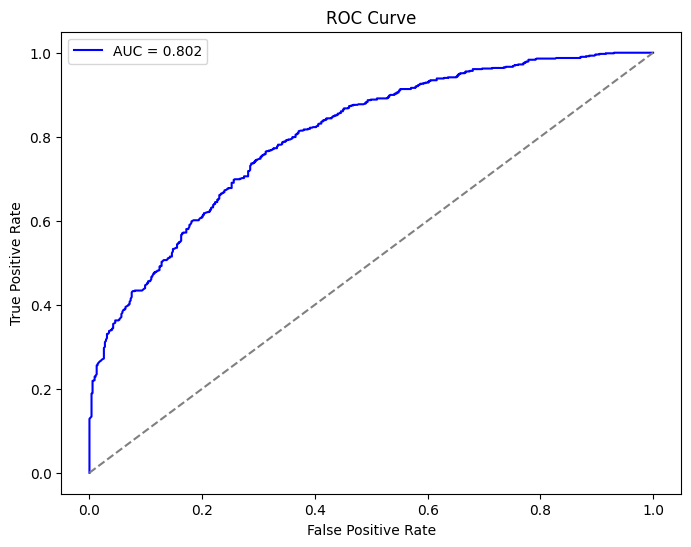

In [ ]:
import torch
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from transformers import (AutoConfig, AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, DataCollatorWithPadding, EarlyStoppingCallback)
from datasets import Dataset
from torch.optim import AdamW
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve

# Set random seed
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Label mapping
label2id = {"pants-fire": 0, "false": 0, "barely-true": 0, "half-true": 1, "mostly-true": 1, "true": 1}
id2label = {v: k for k, v in label2id.items()}

# Load model and tokenizer
MODEL_ID = "distilbert-base-uncased"
config = AutoConfig.from_pretrained(MODEL_ID, num_labels=2, id2label=id2label, label2id=label2id)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_ID, config=config).to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

def load_and_preprocess_data(train_path: str, test_path: str):
    train_data = pd.read_csv(train_path).dropna(subset=["statement", "evidence", "label"])
    test_data = pd.read_csv(test_path).dropna(subset=["statement", "evidence", "label"])

    train_data["input_text"] = train_data["statement"] + " [SEP] " + train_data["evidence"]
    test_data["input_text"] = test_data["statement"] + " [SEP] " + test_data["evidence"]

    train_data["label"] = train_data["label"].map(label2id)
    test_data["label"] = test_data["label"].map(label2id)

    return Dataset.from_pandas(train_data).shuffle(seed=SEED), Dataset.from_pandas(test_data).shuffle(seed=SEED)

def tokenize_function(examples):
    return tokenizer(examples["input_text"], padding="max_length", truncation=True, max_length=512)

training_args = TrainingArguments(
    output_dir="./model_output",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-5,
    weight_decay=0.05,
    logging_strategy="steps",
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_auc_roc",
    greater_is_better=True,
    seed=SEED,
    fp16=torch.cuda.is_available(),
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)[:, 1].numpy()
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="macro")
    accuracy = accuracy_score(labels, predictions)
    auc_roc = roc_auc_score(labels, probs)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "auc_roc": auc_roc}

def plot_roc_curve(labels, probs, save_path="roc_curve.png"):
    fpr, tpr, _ = roc_curve(labels, probs)
    auc_score = roc_auc_score(labels, probs)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.savefig(save_path)
    plt.show()

def train_and_evaluate(train_path: str, test_path: str):
    train_dataset, test_dataset = load_and_preprocess_data(train_path, test_path)

    tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
    tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

    data_collator = DataCollatorWithPadding(tokenizer)
    optimizer = AdamW(model.parameters(), lr=3e-5, eps=1e-8)

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_test_dataset,
        compute_metrics=compute_metrics,
        data_collator=data_collator,
        optimizers=(optimizer, None),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=1)],
    )

    trainer.train()
    eval_results = trainer.evaluate()
    print("Evaluation Results:", eval_results)

    model.save_pretrained("./model_output")
    tokenizer.save_pretrained("./model_output")

    # Compute ROC Curve
    predictions = trainer.predict(tokenized_test_dataset)
    logits = predictions.predictions  # Extract logits
    labels = predictions.label_ids  # Extract actual labels
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)[:, 1].numpy()
    plot_roc_curve(labels, probs)

if __name__ == "__main__":
    train_and_evaluate("train_no_empty_evidence.csv", "test_no_empty_evidence.csv")

Bert model

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.3,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.3,
  "hidden_size": 768,
  "id2label": {
    "0": "barely-true",
    "1": "true"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "barely-true": 0,
    "false": 0,
    "half-true": 1,
    "mostly-true": 1,
    "pants-fire": 0,
    "true": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_em

Map:   0%|          | 0/7557 [00:00<?, ? examples/s]

Map:   0%|          | 0/1264 [00:00<?, ? examples/s]

Using amp half precision backend
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:474: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, reason, __index_level_0__, input_text, evidence, statement. If id, reason, __index_level_0__, input_text, evidence, statement are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples =

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Auc Roc
0,No log,0.673543,0.583861,0.642306,0.522447,0.423931,0.693311
1,No log,0.584378,0.713608,0.732377,0.685792,0.685480,0.789793
2,0.626400,0.646892,0.719937,0.730295,0.696356,0.698092,0.790109
3,0.626400,0.661678,0.731013,0.740314,0.709153,0.711845,0.800515
4,0.493100,0.682716,0.737342,0.746835,0.716032,0.719113,0.804391


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, reason, input_text, evidence, statement. If id, reason, input_text, evidence, statement are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1264
  Batch size = 16
Saving model checkpoint to ./model_output/checkpoint-236
Configuration saved in ./model_output/checkpoint-236/config.json
Model weights saved in ./model_output/checkpoint-236/pytorch_model.bin
Deleting older checkpoint [model_output/checkpoint-472] due to args.save_total_limit
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)
The following columns in the evaluation set  don't have a corresponding ar

Training completed in 1439.59 seconds.


/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


Configuration saved in ./best_model_auc_0.7898/config.json


Evaluation Results: {'eval_loss': 0.5843781232833862, 'eval_accuracy': 0.7136075949367089, 'eval_precision': 0.7323766244120227, 'eval_recall': 0.6857921616322327, 'eval_f1': 0.6854796358567292, 'eval_auc_roc': 0.7897929367489464, 'eval_runtime': 15.3384, 'eval_samples_per_second': 82.408, 'eval_steps_per_second': 5.15, 'epoch': 5.0}


Model weights saved in ./best_model_auc_0.7898/pytorch_model.bin
tokenizer config file saved in ./best_model_auc_0.7898/tokenizer_config.json
Special tokens file saved in ./best_model_auc_0.7898/special_tokens_map.json
The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, reason, input_text, evidence, statement. If id, reason, input_text, evidence, statement are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1264
  Batch size = 16
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)
The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored

ROC curve saved as roc_curve.png


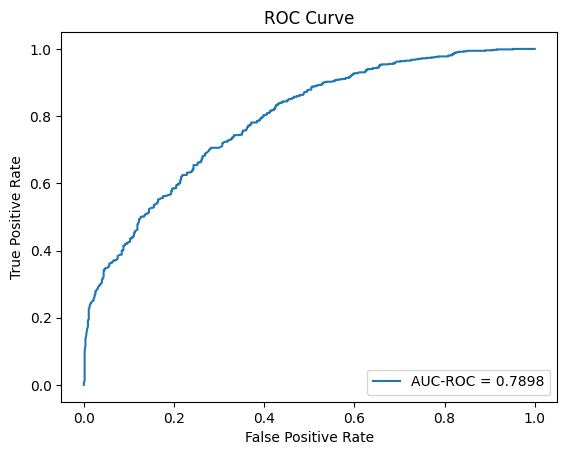

In [ ]:
import torch
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import Dataset

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Label mapping (handle imbalance)
label2id = {"pants-fire": 0, "false": 0, "barely-true": 0, "half-true": 1, "mostly-true": 1, "true": 1}
id2label = {v: k for k, v in label2id.items()}

# Load model and tokenizer for BERT
MODEL_ID = "bert-base-uncased"
config = AutoConfig.from_pretrained(
    MODEL_ID,
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
    hidden_dropout_prob=0.3,
    attention_probs_dropout_prob=0.3
)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_ID, config=config).to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

# Load and preprocess data
def load_and_preprocess_data(train_path: str, test_path: str):
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    train_data.dropna(subset=["statement", "evidence", "label"], inplace=True)
    test_data.dropna(subset=["statement", "evidence", "label"], inplace=True)
    train_data["input_text"] = train_data["statement"] + " [SEP] " + train_data["evidence"]
    test_data["input_text"] = test_data["statement"] + " [SEP] " + test_data["evidence"]
    train_data["label"] = train_data["label"].map(label2id)
    test_data["label"] = test_data["label"].map(label2id)
    train_dataset = Dataset.from_pandas(train_data).shuffle(seed=SEED)
    test_dataset = Dataset.from_pandas(test_data).shuffle(seed=SEED)
    return train_dataset, test_dataset

# Tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples["input_text"],
        padding="max_length",
        truncation=True,
        max_length=512
    )

# Training arguments
training_args = TrainingArguments(
    output_dir="./model_output",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-5,
    weight_decay=0.05,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    seed=SEED,
    report_to="wandb",
    run_name="bert_fakenews_experiment",
    fp16=torch.cuda.is_available(),
    gradient_accumulation_steps=2,
)

# Compute evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)[:, 1].numpy()
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="macro")
    accuracy = accuracy_score(labels, predictions)
    auc_roc = roc_auc_score(labels, probs)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "auc_roc": auc_roc}

# Train and evaluate
def train_and_evaluate(train_path: str, test_path: str):
    train_dataset, test_dataset = load_and_preprocess_data(train_path, test_path)
    tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
    tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)
    data_collator = DataCollatorWithPadding(tokenizer)
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_test_dataset,
        compute_metrics=compute_metrics,
        data_collator=data_collator,
    )
    start_time = time.time()
    trainer.train()
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")
    eval_results = trainer.evaluate()
    print("Evaluation Results:", eval_results)

    # Save best model based on AUC-ROC
    best_auc_roc = eval_results.get("eval_auc_roc", 0)
    model.save_pretrained(f"./best_model_auc_{best_auc_roc:.4f}")
    tokenizer.save_pretrained(f"./best_model_auc_{best_auc_roc:.4f}")

    # Generate ROC Curve
    logits, labels = trainer.predict(tokenized_test_dataset).predictions, trainer.predict(tokenized_test_dataset).label_ids
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)[:, 1].numpy()
    fpr, tpr, _ = roc_curve(labels, probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC-ROC = {best_auc_roc:.4f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    print("ROC curve saved as roc_curve.png")

if __name__ == "__main__":
    train_path = "train_no_empty_evidence.csv"
    test_path = "test_no_empty_evidence.csv"
    train_and_evaluate(train_path, test_path)


In [ ]:
import shutil
from google.colab import files

# Zip the model_output folder
shutil.make_archive("model_output", 'zip', "model_output")

# Download the zipped folder
files.download("model_output.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
import os

# Define the save path in Google Drive
save_path = "bert_fact_checker.pth"

# Save the model's state dictionary
torch.save(model.state_dict(), save_path)

print(f"Model saved at {save_path}")

Model saved at bert_fact_checker.pth


In [ ]:
import torch

# Define the save directory
save_directory = "bert_fact"

# Save the model and tokenizer
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

# Save training arguments (optional)
torch.save(training_args, f"{save_directory}/training_args.bin")

print(f"Model saved to {save_directory}")

Model saved to bert_fact


Deberta

In [ ]:
import torch
import numpy as np
import time
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from transformers import (
    AutoConfig,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
    EarlyStoppingCallback
)
from datasets import Dataset
from torch.optim import AdamW
import gc

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Label mapping (handle imbalance)
label2id = {"pants-fire": 0, "false": 0, "barely-true": 0, "half-true": 1, "mostly-true": 1, "true": 1}
id2label = {0: "false", 1: "true"}

# Load model and tokenizer for DeBERTa
MODEL_ID = "microsoft/deberta-v3-large"
config = AutoConfig.from_pretrained(
    MODEL_ID,
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
    hidden_dropout_prob=0.3,
    attention_probs_dropout_prob=0.3,
    gradient_checkpointing=True  # Enable to reduce memory usage
)

model = AutoModelForSequenceClassification.from_pretrained(MODEL_ID, config=config).to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

def load_and_preprocess_data(train_path: str, test_path: str):
    """Load and preprocess the datasets from CSV files."""
    train_data = pd.read_csv(train_path).dropna(subset=["statement", "label", "evidence"])
    test_data = pd.read_csv(test_path).dropna(subset=["statement", "label", "evidence"])

    train_data["label"] = train_data["label"].map(label2id)
    test_data["label"] = test_data["label"].map(label2id)

    return Dataset.from_pandas(train_data).shuffle(seed=SEED), Dataset.from_pandas(test_data).shuffle(seed=SEED)

def tokenize_function(examples):
    """Tokenizes inputs with truncation and padding."""
    inputs = [s + " [SEP] " + e for s, e in zip(examples["statement"], examples["evidence"])]
    return tokenizer(inputs, padding=True, truncation=True, max_length=512)

def compute_metrics(eval_pred):
    """Computes accuracy, precision, recall, F1-score, and AUC-ROC."""
    logits, labels = eval_pred
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)[:, 1].numpy()
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="macro")
    accuracy = accuracy_score(labels, predictions)
    auc_roc = roc_auc_score(labels, probs)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "auc_roc": auc_roc}

training_args = TrainingArguments(
    output_dir="./model_output",
    num_train_epochs=5,
    per_device_train_batch_size=4,  # Reduced batch size to save memory
    per_device_eval_batch_size=4,   # Reduced batch size to save memory
    learning_rate=3e-5,
    weight_decay=0.01,
    logging_strategy="steps",
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="auc_roc",
    greater_is_better=True,
    seed=SEED,
    report_to="tensorboard",
    fp16=torch.cuda.is_available(),
    gradient_accumulation_steps=2,  # Use gradient accumulation for effective batch size
)

def train_and_evaluate(train_path: str, test_path: str):
    train_dataset, test_dataset = load_and_preprocess_data(train_path, test_path)
    tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
    tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

    data_collator = DataCollatorWithPadding(tokenizer)
    optimizer = AdamW(model.parameters(), lr=3e-5, eps=1e-8)

    torch.cuda.empty_cache()  # Free unused GPU memory
    gc.collect()  # Collect garbage

    model.gradient_checkpointing_enable()  # Ensure gradient checkpointing is enabled

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_test_dataset,
        compute_metrics=compute_metrics,
        data_collator=data_collator,
        optimizers=(optimizer, None),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )

    start_time = time.time()
    trainer.train()
    print(f"Training completed in {time.time() - start_time:.2f} seconds.")

    eval_results = trainer.evaluate()
    print("Evaluation Results:", eval_results)

    model.save_pretrained("./model_output")
    tokenizer.save_pretrained("./model_output")

if __name__ == "__main__":
    train_and_evaluate("train_no_empty_evidence.csv", "test_no_empty_evidence.csv")


https://huggingface.co/microsoft/deberta-v3-large/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp_css9l5p


Downloading:   0%|          | 0.00/580 [00:00<?, ?B/s]

storing https://huggingface.co/microsoft/deberta-v3-large/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/f5d66efa509542e643c08a1579633e747d1697b1bec7de32c51c6969a16e81b9.3554ddad32be74b53d95a4b5760f07a2cd799268a921ae9437b1ee7a47adebc9
creating metadata file for /root/.cache/huggingface/transformers/f5d66efa509542e643c08a1579633e747d1697b1bec7de32c51c6969a16e81b9.3554ddad32be74b53d95a4b5760f07a2cd799268a921ae9437b1ee7a47adebc9
loading configuration file https://huggingface.co/microsoft/deberta-v3-large/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/f5d66efa509542e643c08a1579633e747d1697b1bec7de32c51c6969a16e81b9.3554ddad32be74b53d95a4b5760f07a2cd799268a921ae9437b1ee7a47adebc9
Model config DebertaV2Config {
  "_name_or_path": "microsoft/deberta-v3-large",
  "attention_probs_dropout_prob": 0.3,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.3,
  "hidden_size": 1024,
  "id2label": {
    "0": "false",
    "1": "true"
  },
  "init

Downloading:   0%|          | 0.00/833M [00:00<?, ?B/s]

storing https://huggingface.co/microsoft/deberta-v3-large/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/eed737dd80585a756b0286a093059c2b4403b98a17ac2cb50cda7799c653fc11.e38140a56995392eade33ad2835bb905412b65ba305475bd577c00edb10c45d9
creating metadata file for /root/.cache/huggingface/transformers/eed737dd80585a756b0286a093059c2b4403b98a17ac2cb50cda7799c653fc11.e38140a56995392eade33ad2835bb905412b65ba305475bd577c00edb10c45d9
loading weights file https://huggingface.co/microsoft/deberta-v3-large/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/eed737dd80585a756b0286a093059c2b4403b98a17ac2cb50cda7799c653fc11.e38140a56995392eade33ad2835bb905412b65ba305475bd577c00edb10c45d9
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias', 'mask_predicti

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

storing https://huggingface.co/microsoft/deberta-v3-large/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/cae8294cb38511dc11086c090549f0a079bc5537a0f9a482d8358f17acc8cff0.df5a7f41459442f66bec27ac9352bba694cde109855024b3ae61be2f5734ee9a
creating metadata file for /root/.cache/huggingface/transformers/cae8294cb38511dc11086c090549f0a079bc5537a0f9a482d8358f17acc8cff0.df5a7f41459442f66bec27ac9352bba694cde109855024b3ae61be2f5734ee9a
loading configuration file https://huggingface.co/microsoft/deberta-v3-large/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/f5d66efa509542e643c08a1579633e747d1697b1bec7de32c51c6969a16e81b9.3554ddad32be74b53d95a4b5760f07a2cd799268a921ae9437b1ee7a47adebc9
Model config DebertaV2Config {
  "_name_or_path": "microsoft/deberta-v3-large",
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 

Downloading:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

storing https://huggingface.co/microsoft/deberta-v3-large/resolve/main/spm.model in cache at /root/.cache/huggingface/transformers/6386fc34376768db39488179803c16268ff12ee177a43a993690f66b7d7a0b7c.0abaeacf7287ee8ba758fec15ddfb4bb6c697bb1a8db272725f8aa633501787a
creating metadata file for /root/.cache/huggingface/transformers/6386fc34376768db39488179803c16268ff12ee177a43a993690f66b7d7a0b7c.0abaeacf7287ee8ba758fec15ddfb4bb6c697bb1a8db272725f8aa633501787a
loading file https://huggingface.co/microsoft/deberta-v3-large/resolve/main/spm.model from cache at /root/.cache/huggingface/transformers/6386fc34376768db39488179803c16268ff12ee177a43a993690f66b7d7a0b7c.0abaeacf7287ee8ba758fec15ddfb4bb6c697bb1a8db272725f8aa633501787a
loading file https://huggingface.co/microsoft/deberta-v3-large/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/microsoft/deberta-v3-large/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/microsof

Map:   0%|          | 0/7557 [00:00<?, ? examples/s]

Map:   0%|          | 0/1264 [00:00<?, ? examples/s]

Using amp half precision backend
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:474: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
The following columns in the training set  don't have a corresponding argument in `DebertaV2ForSequenceClassification.forward` and have been ignored: id, reason, __index_level_0__, evidence, statement. If id, reason, __index_level_0__, evidence, statement are not expected by `DebertaV2ForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 7557
  Num Epochs = 5
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 2
  Total optimization steps = 4725
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)`

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Roberta

Alberta

In [ ]:
import torch
import numpy as np
import time
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import Dataset
from transformers import DataCollatorWithPadding
import torch.nn.functional as F

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Label mapping (handle imbalance)
label2id = {"pants-fire": 0, "false": 0, "barely-true": 0, "half-true": 1, "mostly-true": 1, "true": 1}
id2label = {v: k for k, v in label2id.items()}

# Load model and tokenizer for ALBERT
MODEL_ID = "albert-base-v2"  # Use ALBERT base model
config = AutoConfig.from_pretrained(
    MODEL_ID,
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
    hidden_dropout_prob=0.3,
    attention_probs_dropout_prob=0.3
)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_ID, config=config).to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

# Load and preprocess data
def load_and_preprocess_data(train_path: str, test_path: str):
    train_data = pd.read_csv(train_path).dropna(subset=["statement", "evidence", "label"])
    test_data = pd.read_csv(test_path).dropna(subset=["statement", "evidence", "label"])

    train_data["input_text"] = train_data["statement"] + " [SEP] " + train_data["evidence"]
    test_data["input_text"] = test_data["statement"] + " [SEP] " + test_data["evidence"]

    train_data["label"] = train_data["label"].map(label2id)
    test_data["label"] = test_data["label"].map(label2id)

    train_dataset = Dataset.from_pandas(train_data).shuffle(seed=SEED)
    test_dataset = Dataset.from_pandas(test_data).shuffle(seed=SEED)

    return train_dataset, test_dataset

# Tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples["input_text"],
        padding="max_length",
        truncation=True,
        max_length=512
    )

# Training arguments
training_args = TrainingArguments(
    output_dir="./model_output",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-5,
    weight_decay=0.05,
    logging_strategy="steps",
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    seed=SEED,
    report_to="tensorboard",
    fp16=torch.cuda.is_available(),
    gradient_accumulation_steps=2,
)

# Compute evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = F.softmax(torch.tensor(logits), dim=-1).numpy()[:, 1]  # Probabilities for class 1
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="macro")
    accuracy = accuracy_score(labels, predictions)
    auc_roc = roc_auc_score(labels, probs)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "auc_roc": auc_roc}

# Train and evaluate
def train_and_evaluate(train_path: str, test_path: str):
    train_dataset, test_dataset = load_and_preprocess_data(train_path, test_path)
    tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
    tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

    data_collator = DataCollatorWithPadding(tokenizer)

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_test_dataset,
        compute_metrics=compute_metrics,
        data_collator=data_collator,
    )

    start_time = time.time()
    trainer.train()
    print(f"Training completed in {time.time() - start_time:.2f} seconds.")

    eval_results = trainer.evaluate()
    print("Evaluation Results:", eval_results)
    model.save_pretrained("./model_output")
    tokenizer.save_pretrained("./model_output")

if __name__ == "__main__":
    train_and_evaluate("train_no_empty_evidence.csv", "test_no_empty_evidence.csv")

https://huggingface.co/albert-base-v2/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp2jp452gp


Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

storing https://huggingface.co/albert-base-v2/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/e48be00f755a5f765e36a32885e8d6a573081df3321c9e19428d12abadf7dba2.b8f28145885741cf994c0e8a97b724f6c974460c297002145e48e511d2496e88
creating metadata file for /root/.cache/huggingface/transformers/e48be00f755a5f765e36a32885e8d6a573081df3321c9e19428d12abadf7dba2.b8f28145885741cf994c0e8a97b724f6c974460c297002145e48e511d2496e88
loading configuration file https://huggingface.co/albert-base-v2/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/e48be00f755a5f765e36a32885e8d6a573081df3321c9e19428d12abadf7dba2.b8f28145885741cf994c0e8a97b724f6c974460c297002145e48e511d2496e88
Model config AlbertConfig {
  "_name_or_path": "albert-base-v2",
  "architectures": [
    "AlbertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.3,
  "bos_token_id": 2,
  "classifier_dropout_prob": 0.1,
  "down_scale_factor": 1,
  "embedding_size": 128,
  "eos_token_id": 3,
 

Downloading:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

storing https://huggingface.co/albert-base-v2/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/bf1986d976e9a8320cbd3a0597e610bf299d639ce31b7ca581cbf54be3aaa6d3.d6d54047dfe6ae844e3bf6e7a7d0aff71cb598d3df019361e076ba7639b1da9b
creating metadata file for /root/.cache/huggingface/transformers/bf1986d976e9a8320cbd3a0597e610bf299d639ce31b7ca581cbf54be3aaa6d3.d6d54047dfe6ae844e3bf6e7a7d0aff71cb598d3df019361e076ba7639b1da9b
loading weights file https://huggingface.co/albert-base-v2/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/bf1986d976e9a8320cbd3a0597e610bf299d639ce31b7ca581cbf54be3aaa6d3.d6d54047dfe6ae844e3bf6e7a7d0aff71cb598d3df019361e076ba7639b1da9b
Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.decoder.bias', 'predictions.LayerNorm.bias', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.weight', 'predictions.dens

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

storing https://huggingface.co/albert-base-v2/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/4e4c78080ff79a8b0aa8ce8598b4e54df20ab5cb0755bd61d268d07d92f90799.024cc07195c0ba0b51d4f80061c6115996ff26233f3d04788855b23cdf13fbd5
creating metadata file for /root/.cache/huggingface/transformers/4e4c78080ff79a8b0aa8ce8598b4e54df20ab5cb0755bd61d268d07d92f90799.024cc07195c0ba0b51d4f80061c6115996ff26233f3d04788855b23cdf13fbd5
loading configuration file https://huggingface.co/albert-base-v2/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/e48be00f755a5f765e36a32885e8d6a573081df3321c9e19428d12abadf7dba2.b8f28145885741cf994c0e8a97b724f6c974460c297002145e48e511d2496e88
Model config AlbertConfig {
  "_name_or_path": "albert-base-v2",
  "architectures": [
    "AlbertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0,
  "bos_token_id": 2,
  "classifier_dropout_prob": 0.1,
  "down_scale_factor": 1,
  "embedding_size": 128,
  "eos_token_i

Downloading:   0%|          | 0.00/742k [00:00<?, ?B/s]

storing https://huggingface.co/albert-base-v2/resolve/main/spiece.model in cache at /root/.cache/huggingface/transformers/10be6ce6d3508f1fdce98a57a574283b47c055228c1235f8686f039287ff8174.d6110e25022b713452eb83d5bfa8ae64530995a93d8e694fe52e05aa85dd3a7d
creating metadata file for /root/.cache/huggingface/transformers/10be6ce6d3508f1fdce98a57a574283b47c055228c1235f8686f039287ff8174.d6110e25022b713452eb83d5bfa8ae64530995a93d8e694fe52e05aa85dd3a7d
https://huggingface.co/albert-base-v2/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmppdwfni5j


Downloading:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

storing https://huggingface.co/albert-base-v2/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/828a43aa4b9d07e2b7d3be7c6bc10a3ae6e16e8d9c3a0c557783639de9eaeb1b.670e237d152dd53ef77575d4f4a6cd34158db03128fe4f63437ce0d5992bac74
creating metadata file for /root/.cache/huggingface/transformers/828a43aa4b9d07e2b7d3be7c6bc10a3ae6e16e8d9c3a0c557783639de9eaeb1b.670e237d152dd53ef77575d4f4a6cd34158db03128fe4f63437ce0d5992bac74
loading file https://huggingface.co/albert-base-v2/resolve/main/spiece.model from cache at /root/.cache/huggingface/transformers/10be6ce6d3508f1fdce98a57a574283b47c055228c1235f8686f039287ff8174.d6110e25022b713452eb83d5bfa8ae64530995a93d8e694fe52e05aa85dd3a7d
loading file https://huggingface.co/albert-base-v2/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/828a43aa4b9d07e2b7d3be7c6bc10a3ae6e16e8d9c3a0c557783639de9eaeb1b.670e237d152dd53ef77575d4f4a6cd34158db03128fe4f63437ce0d5992bac74
loading file https://huggingfac

Map:   0%|          | 0/7557 [00:00<?, ? examples/s]

Map:   0%|          | 0/1264 [00:00<?, ? examples/s]

Using amp half precision backend
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:474: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
The following columns in the training set  don't have a corresponding argument in `AlbertForSequenceClassification.forward` and have been ignored: id, reason, __index_level_0__, input_text, evidence, statement. If id, reason, __index_level_0__, input_text, evidence, statement are not expected by `AlbertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num exampl

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Auc Roc
0,0.698300,0.687250,0.567247,0.283623,0.500000,0.361938,0.530952
1,0.686600,0.684331,0.567247,0.283623,0.500000,0.361938,0.450524
2,0.687200,0.685147,0.567247,0.283623,0.500000,0.361938,0.479790
3,0.688700,0.684567,0.567247,0.283623,0.500000,0.361938,0.483397
4,0.690800,0.684245,0.567247,0.283623,0.500000,0.361938,0.485761


The following columns in the evaluation set  don't have a corresponding argument in `AlbertForSequenceClassification.forward` and have been ignored: id, reason, input_text, evidence, statement. If id, reason, input_text, evidence, statement are not expected by `AlbertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1264
  Batch size = 16
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Saving model checkpoint to ./model_output/checkpoint-236
Configuration saved in ./model_output/checkpoint-236/config.json
Model weights saved in ./model_output/checkpoint-236/pytorch_model.bin
Deleting older checkpoint [model_output/checkpoint-944] due to args.save_total

Training completed in 1849.01 seconds.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Configuration saved in ./model_output/config.json
Model weights saved in ./model_output/pytorch_model.bin
tokenizer config file saved in ./model_output/tokenizer_config.json
Special tokens file saved in ./model_output/special_tokens_map.json


Evaluation Results: {'eval_loss': 0.6842450499534607, 'eval_accuracy': 0.567246835443038, 'eval_precision': 0.283623417721519, 'eval_recall': 0.5, 'eval_f1': 0.3619384149419485, 'eval_auc_roc': 0.48576105497464295, 'eval_runtime': 21.6736, 'eval_samples_per_second': 58.32, 'eval_steps_per_second': 3.645, 'epoch': 5.0}


In [ ]:
#roberta

https://huggingface.co/roberta-base/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp5ps88c90


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
creating metadata file for /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.3,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.3,
  "hid

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/51ba668f7ff34e7cdfa9561e8361747738113878850a7d717dbc69de8683aaad.c7efaa30a0d80b2958b876969faa180e485944a849deee4ad482332de65365a7
creating metadata file for /root/.cache/huggingface/transformers/51ba668f7ff34e7cdfa9561e8361747738113878850a7d717dbc69de8683aaad.c7efaa30a0d80b2958b876969faa180e485944a849deee4ad482332de65365a7
loading weights file https://huggingface.co/roberta-base/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/51ba668f7ff34e7cdfa9561e8361747738113878850a7d717dbc69de8683aaad.c7efaa30a0d80b2958b876969faa180e485944a849deee4ad482332de65365a7
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/dfe8f1ad04cb25b61a647e3d13620f9bf0a0f51d277897b232a5735297134132.024cc07195c0ba0b51d4f80061c6115996ff26233f3d04788855b23cdf13fbd5
creating metadata file for /root/.cache/huggingface/transformers/dfe8f1ad04cb25b61a647e3d13620f9bf0a0f51d277897b232a5735297134132.024cc07195c0ba0b51d4f80061c6115996ff26233f3d04788855b23cdf13fbd5
loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/vocab.json in cache at /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
creating metadata file for /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
https://huggingface.co/roberta-base/resolve/main/merges.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp7xpct6zu


Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/merges.txt in cache at /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
creating metadata file for /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
https://huggingface.co/roberta-base/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpnmsv1wvb


Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/d53fc0fa09b8342651efd4073d75e19617b3e51287c2a535becda5808a8db287.fc9576039592f026ad76a1c231b89aee8668488c671dfbe6616bab2ed298d730
creating metadata file for /root/.cache/huggingface/transformers/d53fc0fa09b8342651efd4073d75e19617b3e51287c2a535becda5808a8db287.fc9576039592f026ad76a1c231b89aee8668488c671dfbe6616bab2ed298d730
loading file https://huggingface.co/roberta-base/resolve/main/vocab.json from cache at /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
loading file https://huggingface.co/roberta-base/resolve/main/merges.txt from cache at /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/roberta

Map:   0%|          | 0/7557 [00:00<?, ? examples/s]

Map:   0%|          | 0/1264 [00:00<?, ? examples/s]

Using amp half precision backend
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:474: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: id, reason, __index_level_0__, input_text, evidence, statement. If id, reason, __index_level_0__, input_text, evidence, statement are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num exam

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Auc Roc
0,No log,0.684432,0.567247,0.283623,0.500000,0.361938,0.619113
1,No log,0.669075,0.609177,0.603650,0.573370,0.556944,0.628899
2,0.690400,0.678162,0.567247,0.283623,0.500000,0.361938,0.639048
3,0.690400,0.666973,0.576741,0.566282,0.521805,0.450957,0.637041
4,0.682900,0.673750,0.594146,0.590102,0.549284,0.513361,0.638940


The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: id, reason, input_text, evidence, statement. If id, reason, input_text, evidence, statement are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1264
  Batch size = 16
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Saving model checkpoint to ./model_output/checkpoint-236
Configuration saved in ./model_output/checkpoint-236/config.json
Model weights saved in ./model_output/checkpoint-236/pytorch_model.bin
Deleting older checkpoint [model_output/checkpoint-472] due to args.save_tot

Training completed in 1463.97 seconds.


/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


Configuration saved in ./best_model_auc_0.6370/config.json


Evaluation Results: {'eval_loss': 0.6669732332229614, 'eval_accuracy': 0.5767405063291139, 'eval_precision': 0.5662822420634921, 'eval_recall': 0.5218052570251327, 'eval_f1': 0.45095727674029834, 'eval_auc_roc': 0.6370413999015806, 'eval_runtime': 14.5302, 'eval_samples_per_second': 86.991, 'eval_steps_per_second': 5.437, 'epoch': 5.0}


Model weights saved in ./best_model_auc_0.6370/pytorch_model.bin
tokenizer config file saved in ./best_model_auc_0.6370/tokenizer_config.json
Special tokens file saved in ./best_model_auc_0.6370/special_tokens_map.json
The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: id, reason, input_text, evidence, statement. If id, reason, input_text, evidence, statement are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1264
  Batch size = 16
/usr/local/lib/python3.11/dist-packages/transformers/trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


ROC curve saved as roc_curve.png


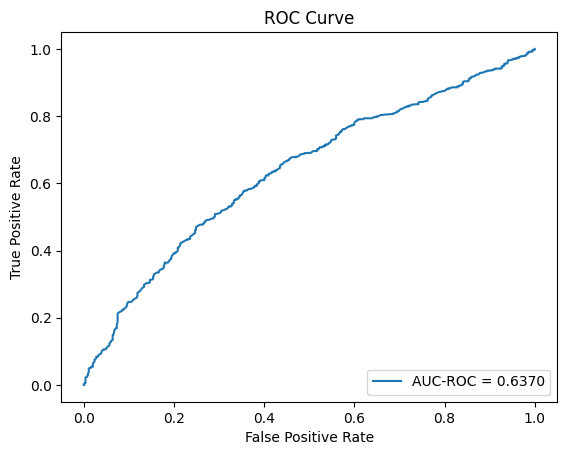

In [ ]:
import torch
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import Dataset

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Label mapping (binary classification)
label2id = {"pants-fire": 0, "false": 0, "barely-true": 0, "half-true": 1, "mostly-true": 1, "true": 1}
id2label = {v: k for k, v in label2id.items()}

# Load model and tokenizer for RoBERTa
MODEL_ID = "roberta-base"
config = AutoConfig.from_pretrained(
    MODEL_ID,
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
    hidden_dropout_prob=0.3,
    attention_probs_dropout_prob=0.3
)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_ID, config=config).to(device)
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

# Load and preprocess data
def load_and_preprocess_data(train_path: str, test_path: str):
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    train_data.dropna(subset=["statement", "evidence", "label"], inplace=True)
    test_data.dropna(subset=["statement", "evidence", "label"], inplace=True)
    # Use RoBERTa's separator token
    train_data["input_text"] = train_data["statement"] + " </s> " + train_data["evidence"]
    test_data["input_text"] = test_data["statement"] + " </s> " + test_data["evidence"]
    train_data["label"] = train_data["label"].map(label2id)
    test_data["label"] = test_data["label"].map(label2id)
    train_dataset = Dataset.from_pandas(train_data).shuffle(seed=SEED)
    test_dataset = Dataset.from_pandas(test_data).shuffle(seed=SEED)
    return train_dataset, test_dataset

# Tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples["input_text"],
        padding="max_length",
        truncation=True,
        max_length=512
    )

# Training arguments
training_args = TrainingArguments(
    output_dir="./model_output",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-5,
    weight_decay=0.05,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    seed=SEED,
    report_to="wandb",
    run_name="roberta_fakenews_experiment",
    fp16=torch.cuda.is_available(),
    gradient_accumulation_steps=2,
)

# Compute evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)[:, 1].numpy()
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="macro")
    accuracy = accuracy_score(labels, predictions)
    auc_roc = roc_auc_score(labels, probs)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "auc_roc": auc_roc}

# Train and evaluate
def train_and_evaluate(train_path: str, test_path: str):
    train_dataset, test_dataset = load_and_preprocess_data(train_path, test_path)
    tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
    tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)
    data_collator = DataCollatorWithPadding(tokenizer)
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_test_dataset,
        compute_metrics=compute_metrics,
        data_collator=data_collator,
    )
    start_time = time.time()
    trainer.train()
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")
    eval_results = trainer.evaluate()
    print("Evaluation Results:", eval_results)

    # Save best model based on AUC-ROC
    best_auc_roc = eval_results.get("eval_auc_roc", 0)
    model.save_pretrained(f"./best_model_auc_{best_auc_roc:.4f}")
    tokenizer.save_pretrained(f"./best_model_auc_{best_auc_roc:.4f}")

    # Generate ROC Curve
    predictions = trainer.predict(tokenized_test_dataset)
    logits, labels = predictions.predictions, predictions.label_ids
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)[:, 1].numpy()
    fpr, tpr, _ = roc_curve(labels, probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC-ROC = {best_auc_roc:.4f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    print("ROC curve saved as roc_curve.png")

if __name__ == "__main__":
    train_path = "train_no_empty_evidence.csv"
    test_path = "test_no_empty_evidence.csv"
    train_and_evaluate(train_path, test_path)
